In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import matplotlib.dates as mdates

path = "/Users/esthersui/Desktop/DIGI/sharedFiles/銷售額/"
df = pd.read_excel(path +'上游.xlsx') 
rows = df.shape[0]

In [49]:
time_label = []
for i in range(1, rows):
    time_label.append(df.iat[i, 0])
upstream = []
s2330 = []
s2454 = []
s2388 = []
s2379 = []
s3008 = []
name = ['2330',"2454", "2388", "2379","3008"]

upstream.append(s2330)
upstream.append(s2454)
upstream.append(s2388)
upstream.append(s2379)
upstream.append(s3008)
for j in range(5):
  for k in range(1, rows):
    upstream[j].append(df.iat[k, (2*j)+1])
    
tl = []
for element in time_label:
  tl.append(int(element.split('年')[1][:-1]) + 12*int(element.split('年')[0][3])-18)

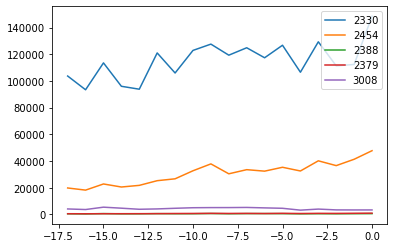

In [50]:
for k in range(5):
  plt.plot(tl, upstream[k], label = name[k])
plt.legend(loc = 1)
plt.show()

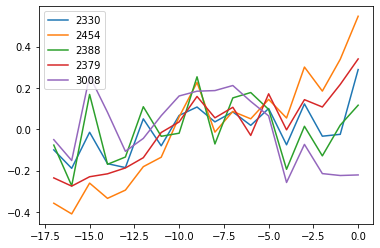

In [51]:
upstream_normed = []
for s in range(5):
  upstream_normed.append([])
for i in range(5):
  u = (sum(upstream[i])/len(upstream[i]))
  for ele in upstream[i]:
    upstream_normed[i].append((ele - u) / u)
    
for k in range(5):
  plt.plot(tl, upstream_normed[k], label = name[k])
plt.legend(loc = 0)
plt.show()

In [52]:
import statistics
std_compare = []
for i in range(5):
    std_compare.append(statistics.stdev(upstream_normed[i]))
std_compare

[0.12310117901527816,
 0.2701454134810636,
 0.14768743489793676,
 0.1799679586178264,
 0.17060972601008548]

In [53]:
#處理確診人數資訊
!gdown --id '151UEEw6bTO3g6JNdNFrpfPC2TAFUNk-0' --output china.xlsx
!gdown --id '12iGYZkq9uAcC8P4g5WNThqz76lg6EWWG' --output taiwan.xlsx
!gdown --id '1nglelEdrfH_fskn7m24FDc97Mn4hqh2v' --output america.xlsx
!gdown --id '14TFGjaWEDJ0CspVwCRO5BybxyAHLVs0x' --output europe.xlsx
taiwan = pd.read_excel('taiwan.xlsx')
rows = taiwan.shape[0]
china = pd.read_excel('china.xlsx')
america = pd.read_excel('america.xlsx')
europe = pd.read_excel('europe.xlsx')
taiwan.iat[1, 5]

Downloading...
From: https://drive.google.com/uc?id=151UEEw6bTO3g6JNdNFrpfPC2TAFUNk-0
To: /Users/esthersui/Desktop/DIGI/china.xlsx
100%|████████████████████████████████████████| 103k/103k [00:00<00:00, 81.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=12iGYZkq9uAcC8P4g5WNThqz76lg6EWWG
To: /Users/esthersui/Desktop/DIGI/taiwan.xlsx
100%|████████████████████████████████████████| 110k/110k [00:00<00:00, 10.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nglelEdrfH_fskn7m24FDc97Mn4hqh2v
To: /Users/esthersui/Desktop/DIGI/america.xlsx
100%|██████████████████████████████████████| 61.1k/61.1k [00:00<00:00, 61.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=14TFGjaWEDJ0CspVwCRO5BybxyAHLVs0x
To: /Users/esthersui/Desktop/DIGI/europe.xlsx
100%|████████████████████████████████████████| 112k/112k [00:00<00:00, 13.5MB/s]


15637

In [54]:
#Taiwan
T = []
for i in range(1, taiwan.shape[0]):
  T.append(taiwan.iat[i, 5])
 
days = list(range(len(T)))
days.reverse()

r = len(T)
for k in range(r):
  days[k] -= r

In [55]:
#China
C = []
for i in range(1, china.shape[0]):
  C.append(china.iat[i, 5])
 
days = list(range(len(C)))
days.reverse()

r = len(C)
for k in range(r):
  days[k] -= r

In [56]:
#America
A = []
for i in range(1, america.shape[0]):
  A.append(america.iat[i, 3])
 
days = list(range(len(A)))
days.reverse()

r = len(A)
for k in range(r):
  days[k] -= r

In [57]:
#Europe
E = []
for i in range(1, europe.shape[0]):
  E.append(europe.iat[i, 5])
 
days = list(range(len(E)))
days.reverse()

r = len(E)
for k in range(r):
  days[k] -= r

In [58]:
from math import *
T_monthly = []
T_monthly_log = []
C_monthly = []
C_monthly_log = []
A_monthly = []
A_monthly_log = []
E_monthly = []
E_monthly_log = []

day = [16, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30]
count = 0
for ele in day:
  count += ele
  T_monthly.append(T[-1*count])
  T_monthly_log.append(log(T[-1*count]))
  C_monthly.append(C[-1*count])
  C_monthly_log.append(log(C[-1*count]))
  A_monthly.append(A[-1*count])
  A_monthly_log.append(log(A[-1*count]))
  E_monthly.append(E[-1*count])
  E_monthly_log.append(log(E[-1*count]))

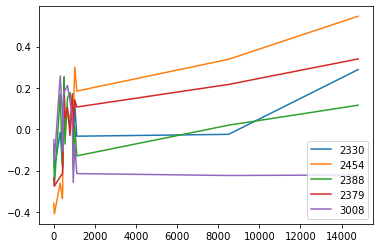

In [59]:
#營業額/疫情
for k in range(5):
  plt.plot(T_monthly, upstream_normed[k], label = name[k])
plt.legend()
plt.show()

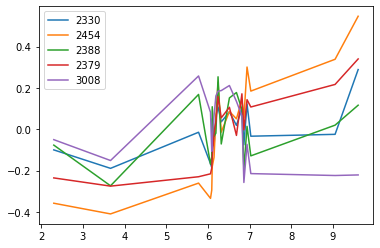

In [60]:
#Taiwan
for k in range(5):
  plt.plot(T_monthly_log, upstream_normed[k], label = name[k])
plt.legend()
plt.show()

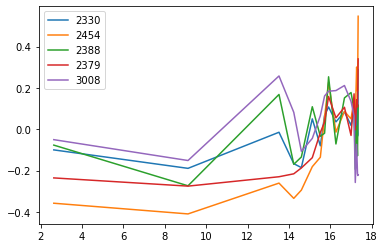

In [61]:
#america
for k in range(5):
  plt.plot(A_monthly_log, upstream_normed[k], label = name[k])
plt.legend()
plt.show()

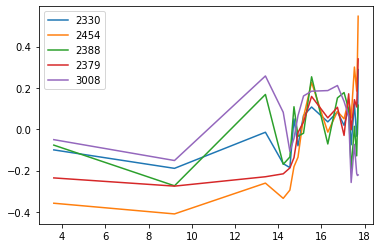

In [62]:
#europe
for k in range(5):
  plt.plot(E_monthly_log, upstream_normed[k], label = name[k])
plt.legend()
plt.show()

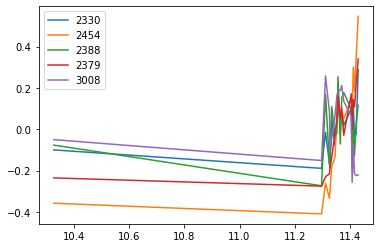

In [63]:
#china
for k in range(5):
  plt.plot(C_monthly_log, upstream_normed[k], label = name[k])
plt.legend()
plt.show()

In [64]:
#tw
import scipy.stats as stats
for i in range(5):
    print(name[i]+'營業額和台灣確診人數(log)的相關係數  =',stats.pearsonr(T_monthly_log, upstream_normed[i])[0])

2330營業額和台灣確診人數(log)的相關係數  = 0.5818249621437236
2454營業額和台灣確診人數(log)的相關係數  = 0.8208933338301685
2388營業額和台灣確診人數(log)的相關係數  = 0.3418438067518985
2379營業額和台灣確診人數(log)的相關係數  = 0.7932558188108931
3008營業額和台灣確診人數(log)的相關係數  = -0.24175285044143738


In [65]:
#china
import scipy.stats as stats
for i in range(5):
    print(name[i]+'營業額和中國確診人數(log)的相關係數  =',stats.pearsonr(C_monthly_log, upstream_normed[i])[0])

2330營業額和中國確診人數(log)的相關係數  = 0.2921776470154641
2454營業額和中國確診人數(log)的相關係數  = 0.4648380478869684
2388營業額和中國確診人數(log)的相關係數  = 0.15669875891995855
2379營業額和中國確診人數(log)的相關係數  = 0.4567537956802521
3008營業額和中國確診人數(log)的相關係數  = -0.001282634991821208


In [66]:
#america
import scipy.stats as stats
for i in range(5):
    print(name[i]+'營業額和美國確診人數(log)的相關係數  =',stats.pearsonr(A_monthly_log, upstream_normed[i])[0])

2330營業額和美國確診人數(log)的相關係數  = 0.48915933122029565
2454營業額和美國確診人數(log)的相關係數  = 0.6841433374949908
2388營業額和美國確診人數(log)的相關係數  = 0.33025153026693765
2379營業額和美國確診人數(log)的相關係數  = 0.6806176933529114
3008營業額和美國確診人數(log)的相關係數  = 0.01440668284949806


In [67]:
#Europe
import scipy.stats as stats
for i in range(5):
    print(name[i]+'營業額和歐洲確診人數(log)的相關係數  =',stats.pearsonr(E_monthly_log, upstream_normed[i])[0])

2330營業額和歐洲確診人數(log)的相關係數  = 0.5044150183468985
2454營業額和歐洲確診人數(log)的相關係數  = 0.7216924927670223
2388營業額和歐洲確診人數(log)的相關係數  = 0.31959053626456274
2379營業額和歐洲確診人數(log)的相關係數  = 0.7127082224774465
3008營業額和歐洲確診人數(log)的相關係數  = -0.03518584711454425


In [68]:
#stock
path = "/Users/esthersui/Desktop/DIGI/sharedFiles/"

stockColNames = ["date", "tradeVol", "trade", "openPrice","highestPrice","lowestPrice", "closePrice","dif","transaction" ]

s2330 = pd.read_csv(path+ "stockPrices/upstream/2330.csv", names = stockColNames)

twCase = pd.read_csv(path+"確診人數統計/台灣確診人數統計_E.txt",delimiter = '\t')

upstreamCorps = ['2330',"2317", "2379", "2388","2454", "3008"]
upStocks = pd.DataFrame()

In [69]:
#combining stock and tw new case data -> exclude dates with missing data
useCase = twCase.loc[29:561]
useCase["date"] = pd.to_datetime(useCase["date"]).dt.date
useCase = useCase.drop("ID", axis = 1)
for corp in upstreamCorps:
    sTemp = pd.read_csv(path+ "stockPrices/upstream/"+corp+".csv", names = stockColNames)
    sTemp = sTemp.drop(index = 0)
    sTemp = sTemp.dropna()
    d = sTemp["date"]
    print(corp)
    for i in range(len(sTemp)):
        d.iloc[i]=d.iloc[i].replace(d.iloc[i][0:3], str(int(d.iloc[i][0:3]) + 1911))
    d=pd.to_datetime(d,format='%Y/%m/%d').dt
    sTemp['date'] = pd.to_datetime(sTemp['date']).dt.date
    
    locals()["dataStock" + str(corp)] = sTemp

    if corp == "2330":
        combine = pd.merge(useCase, sTemp, on =["date"], how = "outer")
        combine = combine.replace(",", '')
        combine = combine.dropna()
    else:
        combine = pd.merge(combine, sTemp, on =["date"], how = "outer")
        combine = combine.replace(",", '')
        combine = combine.dropna()
for i in range(0,6):
    locals()["stock"+str(upstreamCorps[i])] = np.array(combine[1:])[:,29+i*8].astype(float)
date = np.array(combine[1:])[:,0]

2330
2317
2379
2388
2454
3008


<ipython-input-69-3e8d4624adcf>:23: FutureWarning: Passing 'suffixes' which cause duplicate columns {'tradeVol_x', 'dif_x', 'highestPrice_x', 'transaction_x', 'trade_x', 'closePrice_x', 'lowestPrice_x', 'openPrice_x'} in the result is deprecated and will raise a MergeError in a future version.
  combine = pd.merge(combine, sTemp, on =["date"], how = "outer")


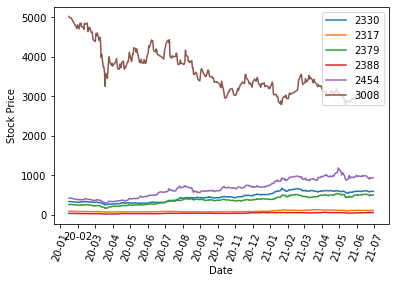

In [98]:
#set plot format
degrees = 70
plt.figure()
ax = plt.gca()
plt.xlabel("Date")
plt.ylabel("Stock Price")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(1))
plt.xticks(rotation = degrees)
#stock plot
for i in range (0,6):
    plt.plot(list(date), locals()["stock"+str(upstreamCorps[i])])
plt.legend(upstreamCorps[:], loc = 1)

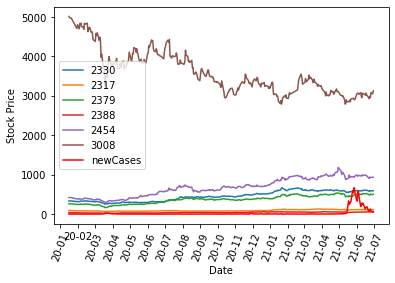

In [102]:
#stock plot w/ newCase
degrees = 70
plt.figure()
ax = plt.gca()
plt.xlabel("Date")
plt.ylabel("Stock Price")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(1))
plt.xticks(rotation = degrees)

legends = upstreamCorps+["newCases"]
for i in range (0,6):
    plt.plot(list(date), locals()["stock"+str(upstreamCorps[i])])
case = np.array(combine[1:])[:,2].astype(float)
plt.plot(list(date),case,color = "red") 
ax.legend(legends[:], loc = 0)
plt.show()